In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:87% !important; }</style>"))

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.signal import find_peaks
from scipy.signal import correlate
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import variation
from scipy.stats import skew
from scipy.stats import iqr
from scipy.stats import ks_2samp
from scipy.stats import gaussian_kde
from sklearn.preprocessing import normalize
import seaborn as sns
import pandas as pd
import sys
import matplotlib as mpl
from matplotlib import rc
mpl.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 18})

In [4]:
def get_column(filename, seq_len, i, resample_n=None):
    arr = np.memmap(filename, 
                    dtype=float, mode='r')

    row_count = arr.shape[0]//seq_len
    arr = arr.reshape((row_count, seq_len))
    ri = np.array(list(range(row_count)))
    if resample_n is not None:
        ri = np.random.choice(ri, resample_n)
    return arr[ri, i]

In [5]:
### constants
ev_to_ms = 0.332

In [6]:
dwell_16si = "/gpfs/commons/groups/innovation/will/nano2ome/dwell_analysis/16i_dwell.npy"
dwell_16sn = "/gpfs/commons/groups/innovation/will/nano2ome/dwell_analysis/16n_dwell.npy"

dwell_23si = "/gpfs/commons/groups/innovation/will/nano2ome/dwell_analysis/23i_dwell.npy"
dwell_23sn = "/gpfs/commons/groups/innovation/will/nano2ome/dwell_analysis/23n_dwell.npy"

dwell_18si = "/gpfs/commons/groups/innovation/will/nano2ome/dwell_analysis/18i_dwell.npy"
dwell_18sn = "/gpfs/commons/groups/innovation/will/nano2ome/dwell_analysis/18n_dwell.npy"

dwell_25si = "/gpfs/commons/groups/innovation/will/nano2ome/dwell_analysis/25i_dwell.npy"
dwell_25sn = "/gpfs/commons/groups/innovation/will/nano2ome/dwell_analysis/25n_dwell.npy"

In [7]:
fa_16s = '/gpfs/commons/projects/ont_nanoprobe/refs/ec16s.fasta'
fa_18s = '/gpfs/commons/projects/ont_nanoprobe/refs/sc18s.fasta'
fa_23s = '/gpfs/commons/projects/ont_nanoprobe/refs/ec23s.fasta'
fa_25s = '/gpfs/commons/projects/ont_nanoprobe/refs/sc25s.fasta'
target_16s = ''.join([line.rstrip() for line in open(fa_16s,'r')][1:]).replace('T','U')
target_18s = ''.join([line.rstrip() for line in open(fa_18s,'r')][1:]).replace('T','U')
target_23s = ''.join([line.rstrip() for line in open(fa_23s,'r')][1:]).replace('T','U')
target_25s = ''.join([line.rstrip() for line in open(fa_25s,'r')][1:]).replace('T','U')

In [8]:
Cm_pos_orig = 1402 # 16S
Um_pos_orig = 2552 # 23S
Gm_pos_orig = 1428 # 18S
Am_pos_orig = 2220 # 25S

print(Cm_pos_orig, Um_pos_orig, Gm_pos_orig, Am_pos_orig)

xr = 10 # registration distance (for dwell)

# Actual indicies are -1 python indexing:
Cm_pos = Cm_pos_orig - 1
Um_pos = Um_pos_orig - 1
Gm_pos = Gm_pos_orig - 1
Am_pos = Am_pos_orig - 1

print(Cm_pos, Um_pos, Gm_pos, Am_pos)

# Need to add the registration distance:
Cm_pos_dwell = Cm_pos + xr
Um_pos_dwell = Um_pos + xr
Gm_pos_dwell = Gm_pos + xr
Am_pos_dwell = Am_pos + xr

print(Cm_pos_dwell, Um_pos_dwell, Gm_pos_dwell, Am_pos_dwell)

1402 2552 1428 2220
1401 2551 1427 2219
1411 2561 1437 2229


In [9]:
# 16S
# ivt_dwell_pos_16 = get_column(dwell_16si, len(target_16s), Cm_pos_dwell)
# ivt_dwell_pos_16 = ivt_dwell_pos_16[~np.isnan(ivt_dwell_pos_16)]
# nat_dwell_pos_16 = get_column(dwell_16sn, len(target_16s), Cm_pos_dwell)
# nat_dwell_pos_16 = nat_dwell_pos_16[~np.isnan(nat_dwell_pos_16)]

# ivt_pore_pos_16 = get_column(dwell_16si, len(target_16s), Cm_pos)
# ivt_pore_pos_16 = ivt_pore_pos_16[~np.isnan(ivt_pore_pos_16)]
# nat_pore_pos_16 = get_column(dwell_16sn, len(target_16s), Cm_pos)
# nat_pore_pos_16 = nat_pore_pos_16[~np.isnan(nat_pore_pos_16)]

In [51]:
# 18S
# ivt_dwell_pos_18 = get_column(dwell_18si, len(target_18s), Gm_pos_dwell)
# ivt_dwell_pos_18 = ivt_dwell_pos_18[~np.isnan(ivt_dwell_pos_18)]
# nat_dwell_pos_18 = get_column(dwell_18sn, len(target_18s), Gm_pos_dwell)
# nat_dwell_pos_18 = nat_dwell_pos_18[~np.isnan(nat_dwell_pos_18)]

# ivt_pore_pos_18 = get_column(dwell_18si, len(target_18s), Gm_pos)
# ivt_pore_pos_18 = ivt_pore_pos_18[~np.isnan(ivt_pore_pos_18)]
# nat_pore_pos_18 = get_column(dwell_18sn, len(target_18s), Gm_pos)
# nat_pore_pos_18 = nat_pore_pos_18[~np.isnan(nat_pore_pos_18)]

In [59]:
# 23S
# ivt_dwell_pos_23 = get_column(dwell_23si, len(target_23s), Um_pos_dwell)
# ivt_dwell_pos_23 = ivt_dwell_pos_23[~np.isnan(ivt_dwell_pos_23)]
# nat_dwell_pos_23 = get_column(dwell_23sn, len(target_23s), Um_pos_dwell)
# nat_dwell_pos_23 = nat_dwell_pos_23[~np.isnan(nat_dwell_pos_23)]

# ivt_pore_pos_23 = get_column(dwell_23si, len(target_23s), Um_pos)
# ivt_pore_pos_23 = ivt_pore_pos_23[~np.isnan(ivt_pore_pos_23)]
# nat_pore_pos_23 = get_column(dwell_23sn, len(target_23s), Um_pos)
# nat_pore_pos_23 = nat_pore_pos_23[~np.isnan(nat_pore_pos_23)]

In [62]:
# 25S
# ivt_dwell_pos_25 = get_column(dwell_25si, len(target_25s), Am_pos_dwell)
# ivt_dwell_pos_25 = ivt_dwell_pos_25[~np.isnan(ivt_dwell_pos_25)]
# nat_dwell_pos_25 = get_column(dwell_25sn, len(target_25s), Am_pos_dwell)
# nat_dwell_pos_25 = nat_dwell_pos_25[~np.isnan(nat_dwell_pos_25)]

# ivt_pore_pos_25 = get_column(dwell_25si, len(target_25s), Am_pos)
# ivt_pore_pos_25 = ivt_pore_pos_25[~np.isnan(ivt_pore_pos_25)]
# nat_pore_pos_25 = get_column(dwell_25sn, len(target_25s), Am_pos)
# nat_pore_pos_25 = nat_pore_pos_25[~np.isnan(nat_pore_pos_25)]

In [92]:
n=1000

#random subsampling + conversion to ms:
#16S
ivt_dwell_pos_16ss = np.random.choice(ivt_dwell_pos_16, n)*ev_to_ms
nat_dwell_pos_16ss = np.random.choice(nat_dwell_pos_16, n)*ev_to_ms
data_16_dwell = [ivt_dwell_pos_16ss, nat_dwell_pos_16ss]
ivt_pore_pos_16ss = np.random.choice(ivt_pore_pos_16, n)*ev_to_ms
nat_pore_pos_16ss = np.random.choice(nat_pore_pos_16, n)*ev_to_ms
data_16_pore = [ivt_pore_pos_16ss, nat_pore_pos_16ss]

#18S
ivt_dwell_pos_18ss = np.random.choice(ivt_dwell_pos_18, n)*ev_to_ms
nat_dwell_pos_18ss = np.random.choice(nat_dwell_pos_18, n)*ev_to_ms
data_18_dwell = [ivt_dwell_pos_18ss, nat_dwell_pos_18ss]
ivt_pore_pos_18ss = np.random.choice(ivt_pore_pos_18, n)*ev_to_ms
nat_pore_pos_18ss = np.random.choice(nat_pore_pos_18, n)*ev_to_ms
data_18_pore = [ivt_pore_pos_18ss, nat_pore_pos_18ss]

#23S
ivt_dwell_pos_23ss = np.random.choice(ivt_dwell_pos_23, n)*ev_to_ms
nat_dwell_pos_23ss = np.random.choice(nat_dwell_pos_23, n)*ev_to_ms
data_23_dwell = [ivt_dwell_pos_23ss, nat_dwell_pos_23ss]
ivt_pore_pos_23ss = np.random.choice(ivt_pore_pos_23, n)*ev_to_ms
nat_pore_pos_23ss = np.random.choice(nat_pore_pos_23, n)*ev_to_ms
data_23_pore = [ivt_pore_pos_23ss, nat_pore_pos_23ss]

#25S
ivt_dwell_pos_25ss = np.random.choice(ivt_dwell_pos_25, n)*ev_to_ms
nat_dwell_pos_25ss = np.random.choice(nat_dwell_pos_25, n)*ev_to_ms
data_25_dwell = [ivt_dwell_pos_25ss, nat_dwell_pos_25ss]
ivt_pore_pos_25ss = np.random.choice(ivt_pore_pos_25, n)*ev_to_ms
nat_pore_pos_25ss = np.random.choice(nat_pore_pos_25, n)*ev_to_ms
data_25_pore = [ivt_pore_pos_25ss, nat_pore_pos_25ss]

6.308454344561796e-10
1.0290430091530852e-21
2.8747384414272637e-31
1.6305276757041005e-44


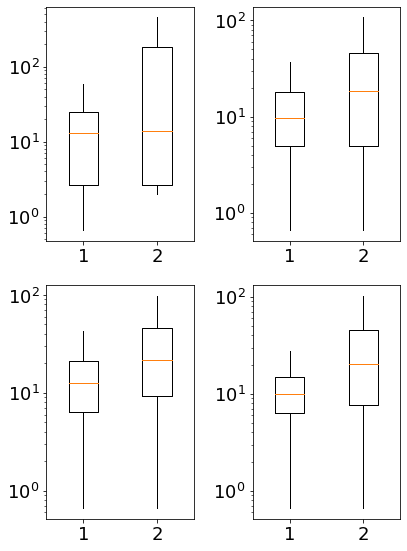

In [94]:
fig999, axs = plt.subplots(2,2, figsize=(6,8))
axs[0,0].boxplot(data_16_dwell, widths=0.4, showcaps=False, showfliers=False)
axs[0,1].boxplot(data_23_dwell, widths=0.4, showcaps=False, showfliers=False)
axs[1,0].boxplot(data_18_dwell, widths=0.4, showcaps=False, showfliers=False)
axs[1,1].boxplot(data_25_dwell, widths=0.4, showcaps=False, showfliers=False)
axs[0,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')

fig999.tight_layout()

[mwu16s, mwu16p] = mannwhitneyu(data_16_dwell[0], data_16_dwell[1]) 
[mwu23s, mwu23p] = mannwhitneyu(data_23_dwell[0], data_23_dwell[1]) 

[mwu18s, mwu18p] = mannwhitneyu(data_18_dwell[0], data_18_dwell[1]) 
[mwu25s, mwu25p] = mannwhitneyu(data_25_dwell[0], data_25_dwell[1]) 

print(mwu16p)
print(mwu23p)
print(mwu18p)
print(mwu25p)

fig999.savefig('plots/Nm_dwells_v1.pdf')